In [1]:
import sys; sys.path.append("../..") # use local neural_maxwell package

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from pdb import set_trace as breakpoint
from time import time

from neural_maxwell.datasets.fdfd import Simulation2D
from neural_maxwell.datasets.generators import PermittivityGenerators2D 
from neural_maxwell.models.maxwell_2d_keras import MaxwellSolverPML2D

from neural_maxwell.constants import *
from neural_maxwell.utils import pbar
from neural_maxwell.plotting import plot_model_outputs_2d

## Training

In [2]:
# Hyperparameters
num_epochs = 100
# learning_rate = 5e-6
batch_size = 512

# Create a model   
channels = [64] * 7
kernels = [5] * 7
model = MaxwellSolverPML2D(channels=channels, kernels=kernels, drop_p=0.0)

# Loss and optimizer
model.compile(optimizer="adam", loss="mse")

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
# Create training data
train_data = np.array([PermittivityGenerators2D.ellipse() for _ in range(int(1e4))])
train_labels = np.zeros(train_data.shape)

test_data = np.array([PermittivityGenerators2D.ellipse() for _ in range(int(1e3))])
test_labels = np.zeros(test_data.shape)

In [4]:
# Train the model

model.fit(train_data, train_labels, batch_size=batch_size, epochs=num_epochs)

# model.train()
# total_step = len(train_loader)
# epoch_iterator = pbar(range(num_epochs))
# params = []

# for epoch in epoch_iterator:
        
#     for i, epsilons in enumerate(train_iterator):
        
#         epsilons = epsilons.float().to(device)

#         outputs = model(epsilons)
#         loss = criterion(outputs, torch.zeros_like(outputs))
        
#         # Backward and optimize
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
        
#         if SHOW_ITERATION_PROGRESS:
#             train_iterator.set_description("ℒ = {:.1e}".format(loss.item()), refresh=False)
#     epoch_iterator.set_description("ℒ = {:.1e}".format(loss.item()), refresh=False)

# # Save the model checkpoint
# torch.save(model.state_dict(), '../models/checkpoints/model1d.ckpt')

ValueError: Invalid dtype tf.complex64

In [6]:
tf.complex([1.0,2.0,3.0],[0.0,0.0,0.0])

<tf.Tensor 'Complex_2:0' shape=(3,) dtype=complex64>

In [ ]:
# Compute loss on test set

model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
test_losses = []

with torch.no_grad():
    start = time()
    for epsilons in pbar(test_loader):
        epsilons = epsilons.float().to(device)
        outputs = model(epsilons)
        loss = criterion(outputs, torch.zeros_like(outputs))
        test_losses.append(loss.item())

print(f"Mean loss: {np.mean(np.array(test_losses))}, time: {time()-start}")

Sim time: 0.02147 | Network time: 0.00298 | Ratio: 0.13896


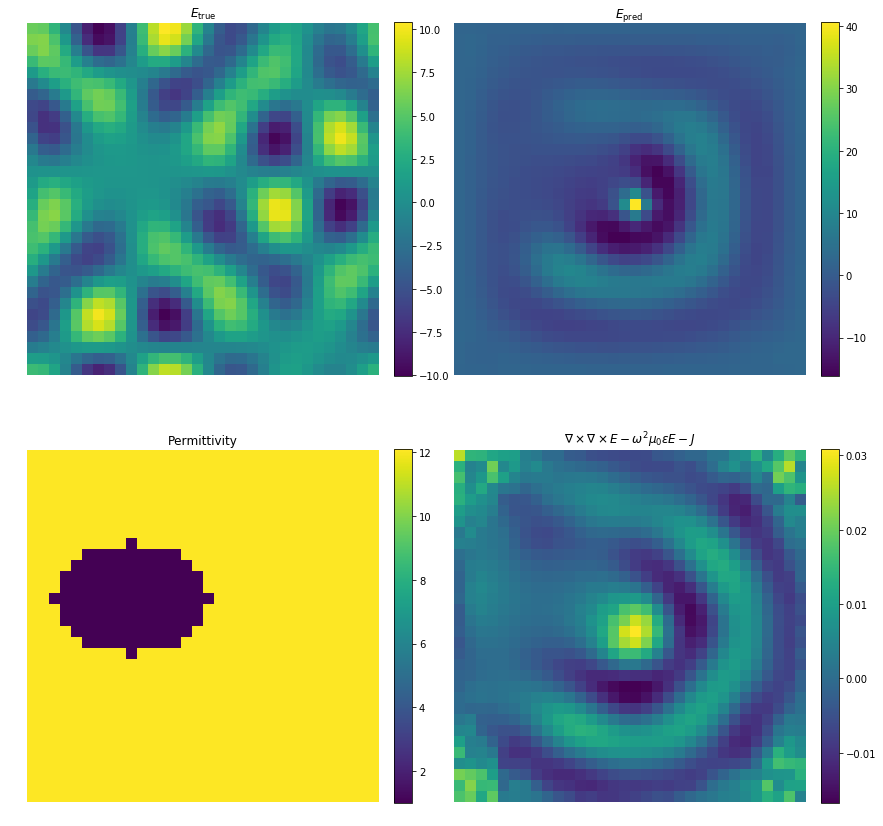

In [4]:
model.eval()
epsilons = train_data[0].numpy()
#epsilons = PermittivityGenerators2D.ellipse()
plot_model_outputs_2d(model, epsilons, rescale=True)